
# Assignment: Flowers Recognition

Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

WORKFLOW :

Load Data

Split into 60 and 40 ratio.

Encode labels.

Create Model

Compilation Step (Note : Its a Multiclass Classification problem , select loss ,metrics according to it)

Train the Model.

If the model gets overfit tune your model by changing the units , No. of layers ,epochs, add dropout layer or add Regularizer according to the need.

Prediction should be > 85%

Evaluation Step

Prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# **Loading File & Converting**

In [2]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/flowers',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/flowers',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


In [3]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [4]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [5]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [6]:
train_generator[31][1].shape

(32, 5)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,  activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [9]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=20)

Epoch 1/20
20/20 [==============================] - 466s 24s/step - loss: 2.1723 - accuracy: 0.1887 - val_loss: 1.6083 - val_accuracy: 0.2463
Epoch 2/20
20/20 [==============================] - 114s 6s/step - loss: 1.6083 - accuracy: 0.2361 - val_loss: 1.6069 - val_accuracy: 0.2448
Epoch 3/20
20/20 [==============================] - 93s 5s/step - loss: 1.7151 - accuracy: 0.2696 - val_loss: 1.6059 - val_accuracy: 0.2432
Epoch 4/20
20/20 [==============================] - 76s 4s/step - loss: 1.6061 - accuracy: 0.2379 - val_loss: 1.6047 - val_accuracy: 0.2432
Epoch 5/20
20/20 [==============================] - 58s 3s/step - loss: 1.6115 - accuracy: 0.2171 - val_loss: 1.6017 - val_accuracy: 0.2494
Epoch 6/20
20/20 [==============================] - 48s 2s/step - loss: 1.5996 - accuracy: 0.2124 - val_loss: 1.5843 - val_accuracy: 0.2147
Epoch 7/20
20/20 [==============================] - 42s 2s/step - loss: 1.6125 - accuracy: 0.1856 - val_loss: 1.5886 - val_accuracy: 0.2479
Epoch 8/20
20/20 

In [10]:
model.evaluate(validation_generator)

130/130 [==============================] - 5s 34ms/step - loss: 1.5408 - accuracy: 0.2996


[1.5408194065093994, 0.299613893032074]

In [11]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

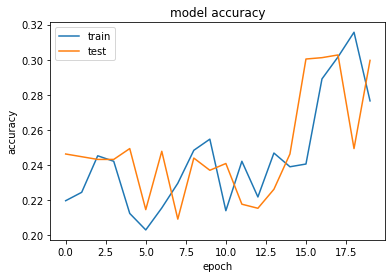

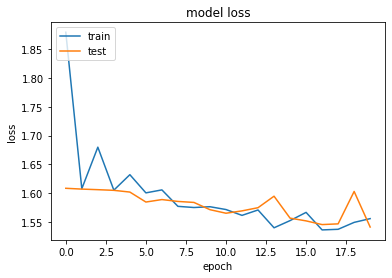

In [12]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred1 = model.predict(validation_generator)

In [14]:
y_pred1.shape

(1295, 5)

In [15]:
list1 = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list1.append(validation_generator[i][1][j].tolist())
        except:
              break

In [16]:
np.argmax(y_pred1, axis=1)[0:30]

array([4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 1, 1, 1, 4, 1, 1, 4])

In [17]:
np.argmax(list1[0:30],axis=1)

array([0, 2, 4, 4, 3, 2, 0, 4, 1, 4, 3, 4, 1, 0, 4, 0, 3, 3, 0, 1, 1, 3,
       1, 4, 1, 1, 1, 4, 4, 1])